# Introduction à la librairie Keras

Pour cette série de TPs nous utiliserons la librairie ***Keras***. Je vous propose dans un premier temps de détailler sur un exemple simple les différentes étapes à mettre en place pour entraîner un réseau à l'aide de cette librairie.

## Exemple de classification simple

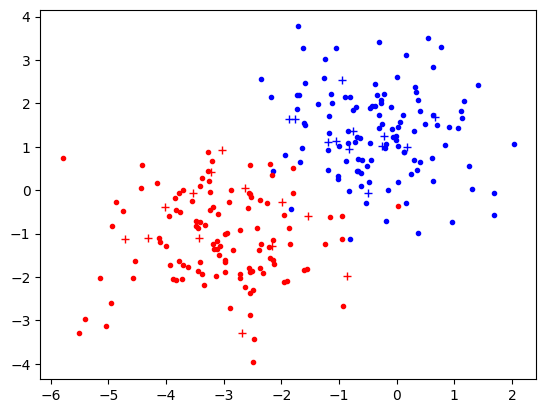

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Génération des données
x, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, center_box=(- 3, 3), random_state=1)
# Partitionnement des données en apprentissage et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# Affichage des données d'apprentissage
plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'b.')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'r.')

# Affichage des données de test
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.show()

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle, auquel on va ensuite ajouter les différentes couches, dans l'ordre
# Il s'agit ici d'un perceptron monocouche avec 2 neurones en entrée, et un neurone en sortie
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2

model.summary() # affiche un résumé du modèle

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from tensorflow.keras import optimizers

# Définition de l'optimiseur
sgd = optimizers.SGD(learning_rate=0.1) # On choisit la descente de gradient stochastique, avec un taux d'apprentissage de 0.1

# On définit ici, pour le modèle introduit plus tôt, l'optimiseur choisi, la fonction de perte (ici
# l'entropie croisée binaire pour un problème de classification binaire) et les métriques que l'on veut observer pendant
# l'entraînement. La précision (accuracy) est un indicateur plus simple à interpréter que l'entropie croisée.
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle avec des mini-batchs de taille 20, sur 15 epochs.
# Le paramètre validation_split signifie qu'on tire aléatoirement une partie des données
# (ici 20%) pour servir d'ensemble de validation
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=20)

Epoch 1/15
9/9 [==============================] - 1s 23ms/step - loss: 0.3819 - accuracy: 0.7833 - val_loss: 0.4202 - val_accuracy: 0.7333
Epoch 2/15
9/9 [==============================] - 0s 8ms/step - loss: 0.2736 - accuracy: 0.8722 - val_loss: 0.3406 - val_accuracy: 0.8444
Epoch 3/15
9/9 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.9333 - val_loss: 0.2958 - val_accuracy: 0.8667
Epoch 4/15
9/9 [==============================] - 0s 10ms/step - loss: 0.1904 - accuracy: 0.9500 - val_loss: 0.2674 - val_accuracy: 0.8667
Epoch 5/15
9/9 [==============================] - 0s 6ms/step - loss: 0.1715 - accuracy: 0.9556 - val_loss: 0.2481 - val_accuracy: 0.8889
Epoch 6/15
9/9 [==============================] - 0s 6ms/step - loss: 0.1581 - accuracy: 0.9611 - val_loss: 0.2342 - val_accuracy: 0.8889
Epoch 7/15
9/9 [==============================] - 0s 6ms/step - loss: 0.1484 - accuracy: 0.9667 - val_loss: 0.2238 - val_accuracy: 0.8889
Epoch 8/15
9/9 [================

La cellule suivante introduit un code permettant de visualiser la frontière de décision du modèle appris.

In [35]:
import numpy as np
def print_decision_boundaries(model, x, y):
  dx, dy = 0.1, 0.1
  y_grid, x_grid = np.mgrid[slice(np.min(x[:,1]), np.max(x[:,1]) + dy, dy),
                  slice(np.min(x[:,0]), np.max(x[:,0]) + dx, dx)]


  x_gen = np.concatenate((np.expand_dims(np.reshape(x_grid, (-1)),1),np.expand_dims(np.reshape(y_grid, (-1)),1)), axis=1)
  z_gen = model.predict(x_gen).reshape(x_grid.shape)

  z_min, z_max = 0, 1

  c = plt.pcolor(x_grid, y_grid, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
  plt.colorbar(c)
  plt.plot(x[y==0,0], x[y==0,1], 'r.')
  plt.plot(x[y==1,0], x[y==1,1], 'b.')
  plt.show()

198/198 [==============================] - 0s 1ms/step


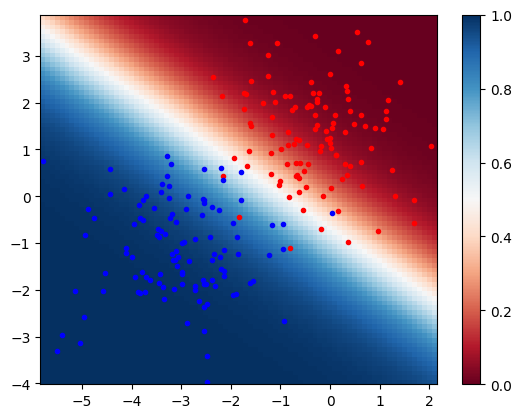

In [36]:
print_decision_boundaries(model, x_train, y_train)

## Exemple de classification plus "complexe"

Pour manipuler un peu la librairie, voici un second problème légèrement plus complexe. A vous de réutiliser les cellules précédentes pour mettre en place un réseau permettant de résoudre ce problème.

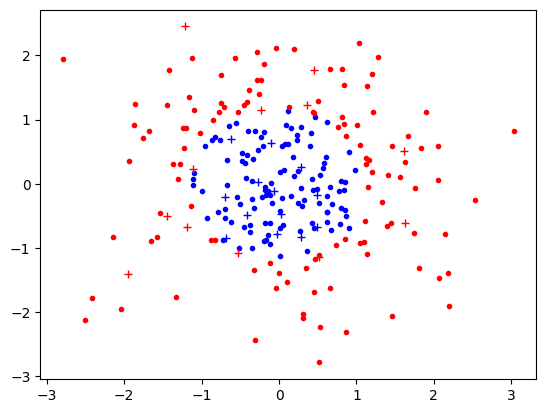

In [37]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)
# Partitionnement des données en apprentissage et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# Affichage des données d'apprentissage
plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'b.')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'r.')

# Affichage des données de test
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')


plt.show()

Il vous faudra au moins deux couches ! Il s'agit toujours d'un problème de classification binaire : la couche de sortie comptera ainsi un seul neurone et portera une fonction d'activation sigmoide.

In [38]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle, auquel on va ensuite ajouter les différentes couches, dans l'ordre
# Il s'agit ici d'un perceptron monocouche avec 2 neurones en entrée, et un neurone en sortie
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary() # affiche un résumé du modèle

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                60        
                                                                 
 dense_17 (Dense)            (None, 6)                 126       
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
from tensorflow.keras import optimizers

# Définition de l'optimiseur
sgd = optimizers.SGD(learning_rate=0.1) # On choisit la descente de gradient stochastique, avec un taux d'apprentissage de 0.1

# On définit ici, pour le modèle introduit plus tôt, l'optimiseur choisi, la fonction de perte (ici
# l'entropie croisée binaire pour un problème de classification binaire) et les métriques que l'on veut observer pendant
# l'entraînement. La précision (accuracy) est un indicateur plus simple à interpréter que l'entropie croisée.
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle avec des mini-batchs de taille 20, sur 15 epochs.
# Le paramètre validation_split signifie qu'on tire aléatoirement une partie des données
# (ici 20%) pour servir d'ensemble de validation
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=20)

Epoch 1/15
9/9 [==============================] - 1s 23ms/step - loss: 0.7068 - accuracy: 0.5389 - val_loss: 0.6788 - val_accuracy: 0.6444
Epoch 2/15
9/9 [==============================] - 0s 8ms/step - loss: 0.6687 - accuracy: 0.5944 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 3/15
9/9 [==============================] - 0s 10ms/step - loss: 0.6383 - accuracy: 0.7111 - val_loss: 0.6169 - val_accuracy: 0.7778
Epoch 4/15
9/9 [==============================] - 0s 7ms/step - loss: 0.6136 - accuracy: 0.7278 - val_loss: 0.5965 - val_accuracy: 0.8444
Epoch 5/15
9/9 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.8111 - val_loss: 0.5646 - val_accuracy: 0.8222
Epoch 6/15
9/9 [==============================] - 0s 9ms/step - loss: 0.5601 - accuracy: 0.8111 - val_loss: 0.5340 - val_accuracy: 0.8667
Epoch 7/15
9/9 [==============================] - 0s 7ms/step - loss: 0.5247 - accuracy: 0.8278 - val_loss: 0.5073 - val_accuracy: 0.8444
Epoch 8/15
9/9 [================

In [40]:
import numpy as np
def print_decision_boundaries(model, x, y):
  dx, dy = 0.1, 0.1
  y_grid, x_grid = np.mgrid[slice(np.min(x[:,1]), np.max(x[:,1]) + dy, dy),
                  slice(np.min(x[:,0]), np.max(x[:,0]) + dx, dx)]


  x_gen = np.concatenate((np.expand_dims(np.reshape(x_grid, (-1)),1),np.expand_dims(np.reshape(y_grid, (-1)),1)), axis=1)
  z_gen = model.predict(x_gen).reshape(x_grid.shape)

  z_min, z_max = 0, 1

  c = plt.pcolor(x_grid, y_grid, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
  plt.colorbar(c)
  plt.plot(x[y==0,0], x[y==0,1], 'r.')
  plt.plot(x[y==1,0], x[y==1,1], 'b.')
  plt.show()

96/96 [==============================] - 0s 2ms/step


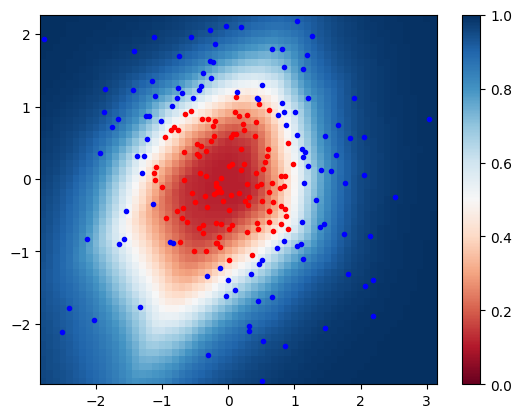

In [41]:
print_decision_boundaries(model, x_train, y_train)

# Classification d'images à l'aide de réseaux convolutifs

On s'intéresse maintenant au problème simple (en apparence) de reconnaître des chiens et des chats dans des images.

<center> <img src="https://drive.google.com/uc?id=11W1SmzrBhL8vyzPCjSkZfHWnxb7kByi5" style="width:1000;height:550px;"></center>
<caption><center><b> Figure 1 : Quelques images de la base de données </b></center></caption>

Pour cela nous allons utiliser une base de données de 4000 images, réparties en 2000 images d'apprentissage, 1000 images de validation, et 1000 images de test. Compte-tenu de la variabilité possible des représentations de chiens et chats, cette base de données est d'une taille assez réduite et le problème est complexe. Il correspond bien aux problèmes que nous pouvons rencontrer dans la réalité, lorsque les données sont souvent difficiles à obtenir.


Il faut définir une résolution commune à toutes les images, qui sera donc la dimension passée en entrée au réseau de neurones. Pour commencer et simplifier le problème, vous pouvez d'abord considérer des images de taille $64 \times 64$ ; plus tard, lorsque vos réseaux fonctionneront bien, nous pourrons envisager d'augmenter cette résolution pour améliorer les performances.  

In [42]:
IMAGE_SIZE = 64
CLASSES = ['cat', 'dog']

## Chargement des données
La base de données est à télécharger depuis Git. Ne passez pas trop de temps à regarder les cellules suivantes (mais exécutez les !).

In [47]:
!git clone https://github.com/axelcarlier/iam.git
path = "./iam/tp3/"

fatal: destination path 'iam' already exists and is not an empty directory.


Chargement des données dans des tenseurs $x$ et $y$ de dimensions respectives $(N, 64, 64, 3)$ et $(N, 1)$, où $N$ désigne le nombre d'éléments de l'ensemble considéré (apprentissage, validation, ou test).

In [48]:
import glob
import PIL
from PIL import Image
import numpy as np

def load_data(path, classes, image_size=64):

  # Liste les fichiers présents dans le dossier path
  file_path = glob.glob(path)

  # Initialise les structures de données
  x = np.zeros((len(file_path), image_size, image_size, 3))
  y = np.zeros((len(file_path), 1))

  for i in range(len(file_path)):
    # Lecture de l'image
    img = Image.open(file_path[i])
    # Mise à l'échelle de l'image
    img = img.resize((image_size,image_size), Image.Resampling.LANCZOS)
    # Remplissage de la variable x
    x[i] = np.asarray(img)

    img_path_split = file_path[i].split('/')
    img_name_split = img_path_split[-1].split('.')
    class_label = classes.index(img_name_split[-3])

    y[i] = class_label

  return x, y

x_train, y_train = load_data('./iam/tp3/train/*', CLASSES, image_size=IMAGE_SIZE)
x_val, y_val = load_data('./iam/tp3/validation/*', CLASSES, image_size=IMAGE_SIZE)
x_test, y_test = load_data('./iam/tp3/test/*', CLASSES, image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Visualisation des images

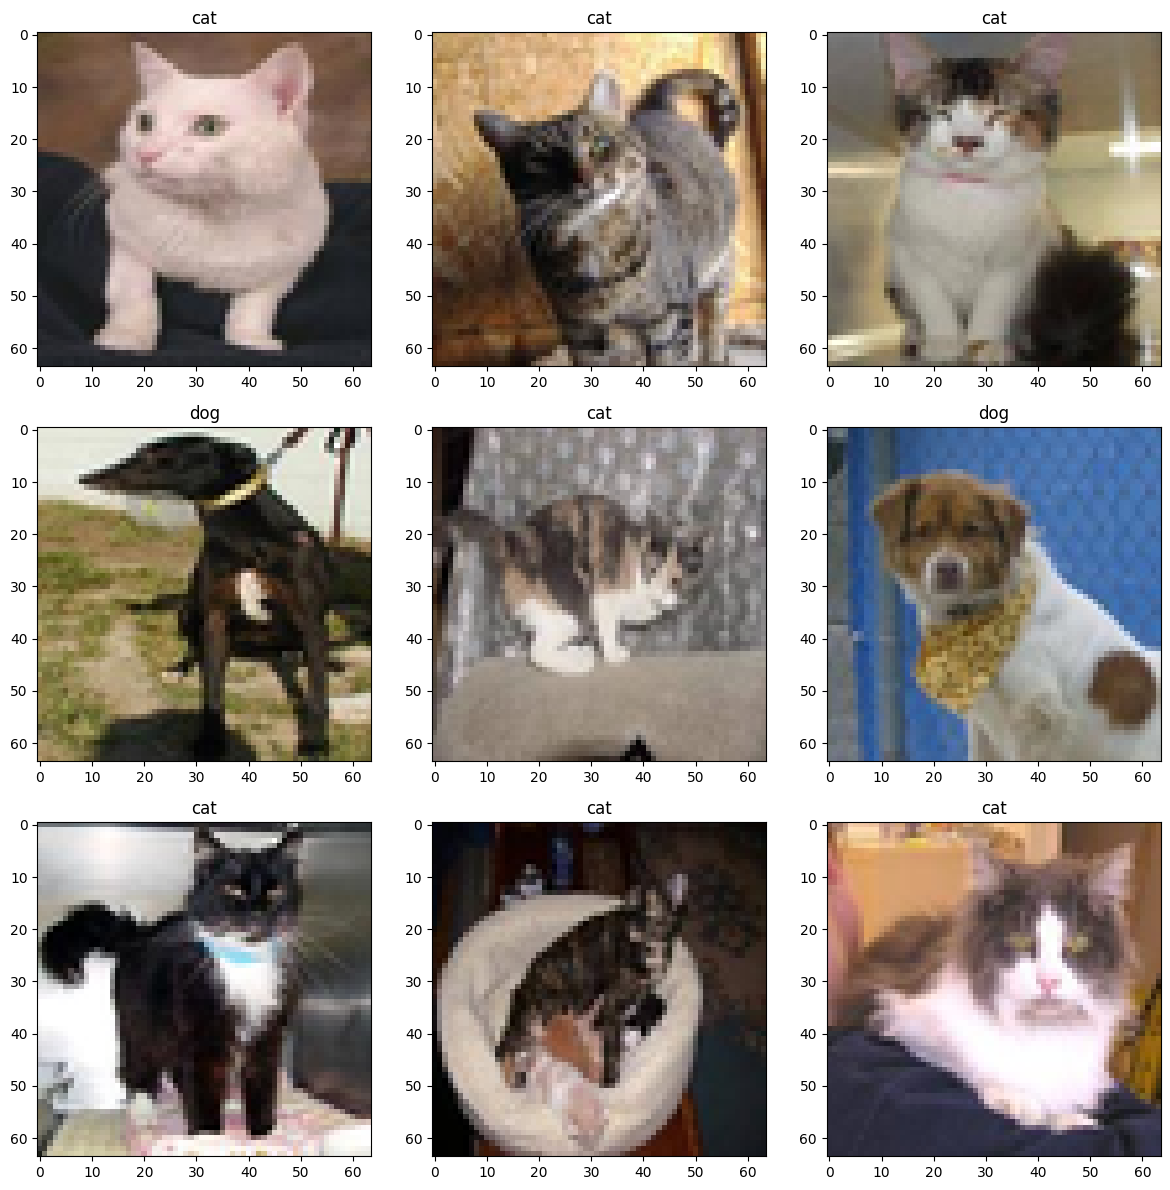

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.title(CLASSES[int(y_train[i])])
    plt.imshow(x_train[i])
plt.tight_layout()
plt.show()

## Implémentation d'un réseau convolutif standard

Les images ont toutes été redimensionnées en $64 \times 64$.
Vous devez définir un réseau de neurones convolutif en suivant ce schéma pour la base convolutive :

<center> <img src="https://drive.google.com/uc?id=1bwXaIgO-pKJGs6fVaX0IrLbFbUAlTvNM" style="width:800;height:400px;"></center>
<caption><center><b> Figure 2: Vue de l'architecture à implémenter </b></center></caption>

Ce réseau alterne dans une première phase des couches de convolution et de Max Pooling (afin de diviser à chaque fois la dimension des tenseurs par 2).

La première couche comptera 32 filtres de convolution, la seconde 64, la troisième 96 et la 4e 128. Enfin, avant la couche de sortie, vous ajouterez une couche dense comptant 512 neurones. Vous aurez donc construit un réseau à 6 couches, sorte de version simplifiée d'AlexNet.

Pour construire ce réseau, vous pouvez utiliser les fonctions Conv2D, Maxpooling2D, et Flatten de Keras.

In [57]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# A COMPLETER
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de le connecter à une couche dense
model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(1, activation='sigmoid'))   # Couche de sortie

In [58]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 96)        

### Entrainement

Pour l'entraînement, vous pouvez utiliser directement les hyperparamètres suivants.

In [59]:
# COMPLETER LA FONCTION DE COUT A UTILISER
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

... puis lancer l'entraînement. **Attention : si jamais vous voulez relancer l'entraînement, il faut réinitialiser les poids du réseau. Pour cela il faut re-exécuter les cellules précédentes à partir de la définition du réseau !** Sinon vous risquez de repartir d'un entraînement précédent (qui s'est éventuellement bien, ou mal déroulé) et mal interpréter votre nouvel entraînement.

In [60]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
200/200 [==============================] - 9s 8ms/step - loss: 0.6953 - accuracy: 0.4940 - val_loss: 0.6920 - val_accuracy: 0.5370
Epoch 2/10
200/200 [==============================] - 2s 7ms/step - loss: 0.6834 - accuracy: 0.5555 - val_loss: 0.6737 - val_accuracy: 0.5870
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6430 - accuracy: 0.6380 - val_loss: 0.6680 - val_accuracy: 0.5960
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6002 - accuracy: 0.6900 - val_loss: 0.6399 - val_accuracy: 0.6640
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5684 - accuracy: 0.7130 - val_loss: 0.6315 - val_accuracy: 0.6640
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5247 - accuracy: 0.7530 - val_loss: 0.5811 - val_accuracy: 0.7060
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4653 - accuracy: 0.7775 - val_loss: 0.5581 - val_accuracy: 0.7270
Epoch 

### Analyse des résultats du modèle

Les quelques lignes suivantes permettent d'afficher l'évolution des métriques au cours de l'entraînement, sur les ensembles d'apprentissage et de validation.

In [61]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

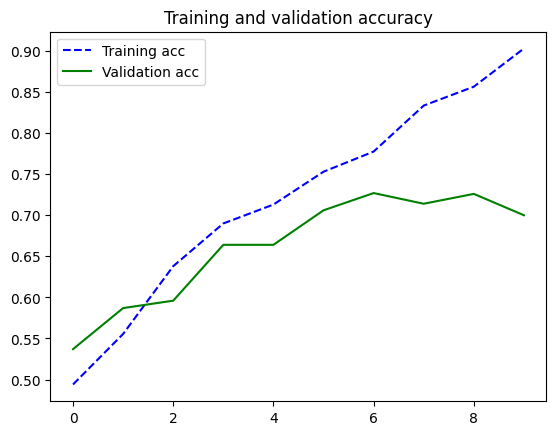

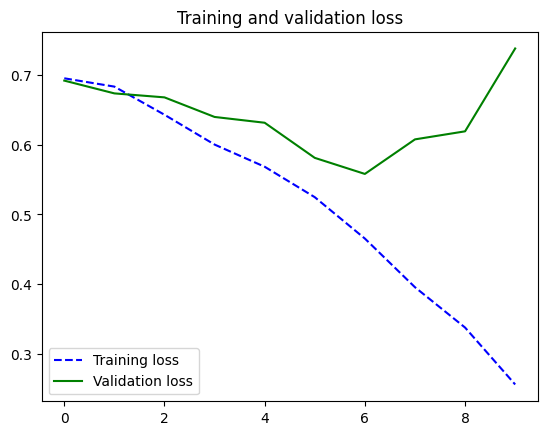

In [62]:
plot_training_analysis()